# Quasilinear and Nonlinear PDEs

Problems are mostly from https://www.math.ucla.edu/~yanovsky/handbooks/PDEs.pdf and https://people.umass.edu/bban/Solutions/Solution_PDE_Partial%20Differential_Strauss.pdf

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, OptimizerType, Comparator, set_seeds, plot_loss_df

## Quasilinear Equation
$$\frac{\partial f}{\partial x} + x^2 y \frac{\partial f}{\partial y} + f = 0$$
$$f(0,y)=y^2$$

The solution is $f(x,y)= y^2 e^{-\frac{2}{3}x^3-x}$

In [2]:
set_seeds(0)
pde = PDEModel("quasilinear", config={"num_epochs": 2000, "optimizer_type": OptimizerType.Adam})
pde.set_state(["x", "y"], {"x": [0., 1.], "y": [0., 1.]})
pde.add_endog("f")
pde.add_endog_equation(r"$\frac{\partial f}{\partial x} + x^2 * y * \frac{\partial f}{\partial y} + f = 0$")

ic_y = torch.zeros((100, 2))
ic_y[:, 1] = torch.Tensor(np.linspace(0, 1, 100))
f_ic_y = ic_y[:, 1:2] ** 2

pde.add_endog_condition("f", 
                        "f(SV)", {"SV": ic_y},
                        Comparator.EQ,
                        "f_ic_y", {"f_ic_y": f_ic_y},
                        label="ic")

print(pde)
if not os.path.exists("./models/quasilinear/model.pt"):
    pde.train_model("./models/quasilinear", "model.pt", True)
    pde.load_model(torch.load("./models/quasilinear/model_best.pt"))
    pde.eval_model(True)
else:
    pde.load_model(torch.load("./models/quasilinear/model_best.pt"))
    pde.eval_model(True)

==========================Summary of Model quasilinear==========================
Config: {
 "batch_size": 100,
 "num_epochs": 2000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [0.0, 1.0]
y: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: f
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=2, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_fea

Total loss: 0.0003: 100%|██████████| 2000/2000 [00:18<00:00, 109.38it/s]

training finished, total time :: 18.28528881072998
Best model saved to ./models/quasilinear/model_best.pt if valid
Model saved to ./models/quasilinear/model.pt
Model loaded
===================================Evaluating===================================
loss :: endogeq_1: 0.0002,
endogvar_f_cond_ic: 0.0000,
total_loss: 0.0002


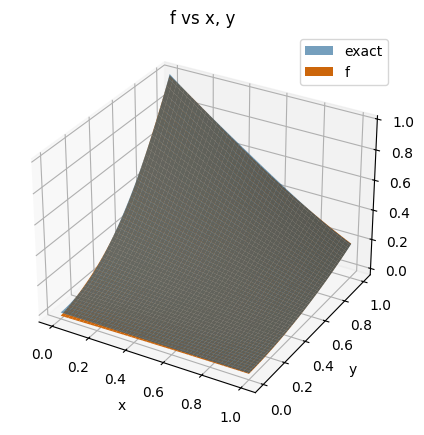

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": "3d"})
x_np = np.linspace(0, 1, 100)
y_np = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_np, y_np)
# $f(x,y)= y^2 e^{-\frac{2}{3}x^3-x}$
exact_Z = Y**2 * np.exp(-2/3 * X**3 - X)
ax.plot_surface(X, Y, exact_Z, label="exact", alpha=0.6)
pde.endog_vars["f"].plot("f", {"x": [0., 1.], "y": [0., 1.]}, ax=ax)
plt.subplots_adjust()
plt.show()

## Cauchy Problem
$$\frac{\partial u}{\partial t} = x \frac{\partial u}{\partial x} - u + 1, x\in [-1,1], t\in [0,1]$$
$$u(x,0)=\sin(x)$$

The solution is $u(x,t)=1-\frac{1}{e^t} + \frac{\sin(xe^t)}{e^t}$

In [4]:
set_seeds(0)
pde = PDEModel("cauchy", config={"num_epochs": 4000, "optimizer_type": OptimizerType.Adam})
pde.set_state(["x", "t"], {"x": [-1., 1.], "t": [0., 1.]})
pde.add_endog("u")
pde.add_endog_equation(r"$\frac{\partial u}{\partial t} = x * \frac{\partial u}{\partial x} - u + 1$")

ic_t = torch.zeros((100, 2))
ic_t[:, 0] = torch.Tensor(np.linspace(0, 1, 100))
u_ic_t = torch.sin(ic_t[:, 0:1])

pde.add_endog_condition("u", 
                        "u(SV)", {"SV": ic_t},
                        Comparator.EQ,
                        "u_ic_t", {"u_ic_t": u_ic_t},
                        label="ic")

print(pde)
if not os.path.exists("./models/cauchy/model.pt"):
    pde.train_model("./models/cauchy", "model.pt", True)
    pde.load_model(torch.load("./models/cauchy/model_best.pt"))
    pde.eval_model(True)
else:
    pde.load_model(torch.load("./models/cauchy/model_best.pt"))
    pde.eval_model(True)

============================Summary of Model cauchy=============================
Config: {
 "batch_size": 100,
 "num_epochs": 4000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-1.0, 1.0]
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: u
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=2, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_fe

  0%|          | 0/4000 [00:00<?, ?it/s]

Total loss: 0.0001: 100%|██████████| 4000/4000 [00:45<00:00, 87.68it/s] 

training finished, total time :: 45.62629699707031
Best model saved to ./models/cauchy/model_best.pt if valid
Model saved to ./models/cauchy/model.pt
Model loaded
===================================Evaluating===================================
loss :: endogeq_1: 0.0000,
endogvar_u_cond_ic: 0.0000,
total_loss: 0.0001


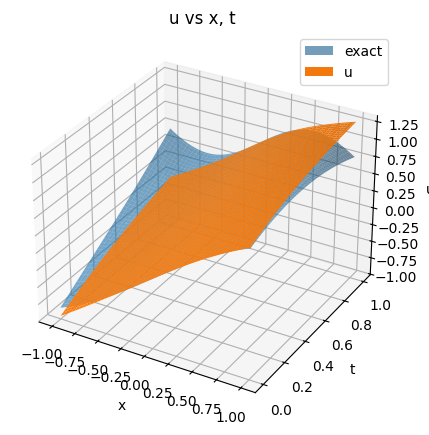

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": "3d"})
x_np = np.linspace(-1, 1, 100)
t_np = np.linspace(0, 1, 100)
X, T = np.meshgrid(x_np, t_np)
# $u(x,t)=1-\frac{1}{e^t} + \frac{\sin(xe^t)}{e^t}$
exact_Z = 1 - 1 / np.exp(T) + np.sin(X*np.exp(T)) / np.exp(T)
ax.plot_surface(X, T, exact_Z, label="exact", alpha=0.6)
pde.endog_vars["u"].plot("u", {"x": [-1., 1.], "t": [0., 1.]}, ax=ax)
plt.subplots_adjust()
plt.show()

## General Nonlinear Equation
$$\frac{1}{2} \left(\frac{\partial u}{\partial x}\right)^2 - \frac{\partial u}{\partial y} = -\frac{x^2}{2}$$
$$u(x,0)=x$$

The solution is $u(x,y)=x\cos y + \frac{\sin y \cos y}{2} + \frac{(x + \sin y)^2 \sin y}{2\cos y}$

In [6]:
set_seeds(0)
pde = PDEModel("nonlinear", config={"num_epochs": 2000, "optimizer_type": OptimizerType.Adam})
pde.set_state(["x", "y"], {"x": [0., 1.], "y": [0., 1.]})
pde.add_endog("u")
pde.add_endog_equation(r"$\frac{1}{2} * \left(\frac{\partial u}{\partial x}\right)^2 - \frac{\partial u}{\partial y} = -\frac{x^2}{2}$")

ic_x = torch.zeros((100, 2))
ic_x[:, 0] = torch.Tensor(np.linspace(0, 1, 100))
f_ic_x = ic_x[:, 0:1]

pde.add_endog_condition("u", 
                        "u(SV)", {"SV": ic_x},
                        Comparator.EQ,
                        "f_ic_x", {"f_ic_x": f_ic_x},
                        label="ic")

print(pde)
if not os.path.exists("./models/nonlinear/model.pt"):
    pde.train_model("./models/nonlinear", "model.pt", True)
    pde.load_model(torch.load("./models/nonlinear/model_best.pt"))
    pde.eval_model(True)
else:
    pde.load_model(torch.load("./models/nonlinear/model_best.pt"))
    pde.eval_model(True)

===========================Summary of Model nonlinear===========================
Config: {
 "batch_size": 100,
 "num_epochs": 2000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [0.0, 1.0]
y: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: u
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=2, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_fea

  0%|          | 0/2000 [00:00<?, ?it/s]

Total loss: 0.0001: 100%|██████████| 2000/2000 [00:20<00:00, 97.46it/s] 

training finished, total time :: 20.524945735931396
Best model saved to ./models/nonlinear/model_best.pt if valid
Model saved to ./models/nonlinear/model.pt
Model loaded
===================================Evaluating===================================
loss :: endogeq_1: 0.0000,
endogvar_u_cond_ic: 0.0000,
total_loss: 0.0000


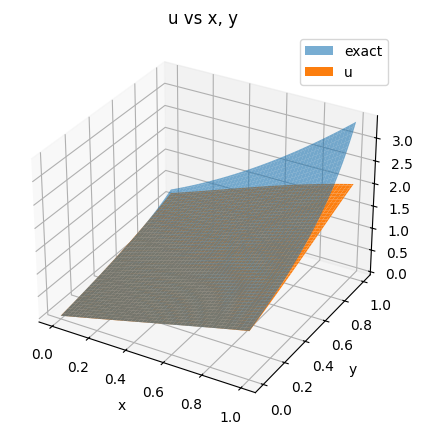

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": "3d"})
x_np = np.linspace(0, 1, 100)
y_np = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_np, y_np)
# $u(x,y)=x\cos y + \frac{\sin y \cos y}{2} + \frac{(x + \sin y)^2 \sin y}{2\cos y}$
exact_Z = X * np.cos(Y) + (np.sin(Y) * np.cos(Y)) / 2 + ((X + np.sin(Y))**2 * np.sin(Y)) / (2*np.cos(Y))
ax.plot_surface(X, Y, exact_Z, label="exact", alpha=0.6)
pde.endog_vars["u"].plot("u", {"x": [0., 1.], "y": [0., 1.]}, ax=ax)
plt.subplots_adjust()
plt.show()

## Transport Problem
$$\frac{\partial^2 u}{\partial x^2} - 3 \frac{\partial^2 u}{\partial x \partial t} - 4\frac{\partial^2 u}{\partial t^2} = 0$$
$$u(x,0)=x^2, \frac{\partial u}{\partial t}(x,0)=e^x$$

The solution is $u(x,t) = \frac{4}{5} (x+0.25 t)^2 + \frac{1}{5} (x-t)^2 + \frac{4}{5} \left(e^{x+0.25t} - e^{x-t}\right)$

In [8]:
set_seeds(0)
pde = PDEModel("transport", config={"num_epochs": 2000, "optimizer_type": OptimizerType.Adam})
pde.set_state(["x", "t"], {"x": [0., 1.], "t": [0., 1.]})
pde.add_endog("u")
pde.add_endog_equation(r"$\frac{\partial^2 u}{\partial x^2} - 3 * \frac{\partial^2 u}{\partial x \partial t} - 4 * \frac{\partial^2 u}{\partial t^2} = 0$")

ic_x = torch.zeros((100, 2))
ic_x[:, 0] = torch.Tensor(np.linspace(0, 1, 100))
u_ic_x = ic_x[:, 0:1] ** 2

ic_x2 = torch.zeros((100, 2))
ic_x2[:, 0] = torch.Tensor(np.linspace(0, 1, 100))
u_ic_x2 = torch.exp(ic_x2[:, 0:1])

pde.add_endog_condition("u", 
                        "u(SV)", {"SV": ic_x},
                        Comparator.EQ,
                        "u_ic_x", {"u_ic_x": u_ic_x},
                        label="ic1")

pde.add_endog_condition("u", 
                        "u_t(SV)", {"SV": ic_x2},
                        Comparator.EQ,
                        "u_ic_x2", {"u_ic_x2": u_ic_x2},
                        label="ic2")

print(pde)
if not os.path.exists("./models/transport/model.pt"):
    pde.train_model("./models/transport", "model.pt", True)
    pde.load_model(torch.load("./models/transport/model_best.pt"))
    pde.eval_model(True)
else:
    pde.load_model(torch.load("./models/nonlinear/model_best.pt"))
    pde.eval_model(True)

===========================Summary of Model transport===========================
Config: {
 "batch_size": 100,
 "num_epochs": 2000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [0.0, 1.0]
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: u
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=2, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_fea

Total loss: 0.0005: 100%|██████████| 2000/2000 [00:35<00:00, 56.07it/s]

training finished, total time :: 35.67275929450989
Best model saved to ./models/transport/model_best.pt if valid
Model saved to ./models/transport/model.pt
Model loaded
===================================Evaluating===================================
loss :: endogeq_1: 0.0001,
endogvar_u_cond_ic1: 0.0000,
endogvar_u_cond_ic2: 0.0002,
total_loss: 0.0003


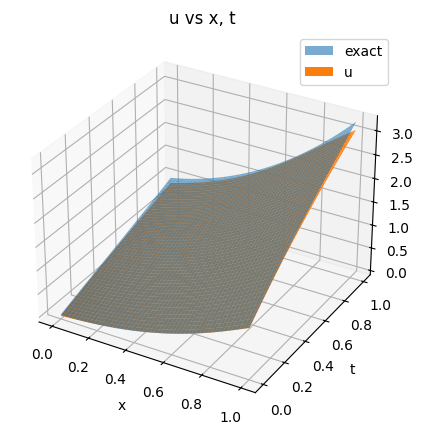

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": "3d"})
x_np = np.linspace(0, 1, 100)
t_np = np.linspace(0, 1, 100)
X, T = np.meshgrid(x_np, t_np)
# $u(x,t) = \frac{4}{5} (x+0.25 t)^2 + \frac{1}{5} (x-t)^2 + \frac{4}{5} \left(e^{x+0.25t} - e^{x-t}\right)$
exact_Z = 4/5 * (X + 0.25 * T)** 2 + 1/5 * (X-T)**2 + 4/5 * (np.exp(X+0.25*T) - np.exp(X-T))
ax.plot_surface(X, T, exact_Z, label="exact", alpha=0.6)
pde.endog_vars["u"].plot("u", {"x": [0., 1.], "t": [0., 1.]}, ax=ax)
plt.subplots_adjust()
plt.show()